In [7]:
!pip install tensorflow tensorflow-gpu pandas numpy matplotlib scikit-learn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [68 lines of output]
      Traceback (most recent call last):
        File "C:\Users\disha\AppData\Local\Programs\Python\Python313\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
        File "C:\Users\disha\AppData\Local\Programs\Python\Python313\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "C:\Users\disha\AppData\Local\Programs\Python\Python313\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
        File "C:\Users\disha\AppData\Local\Programs\Python\Python313\Lib\site-packages\packaging\_parser.py", line 124, in

In [8]:
import os
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(os.path.join('data','train.csv'))

In [10]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


VECTORISATION (PREPROCESSING DATA)

In [11]:
from tensorflow.keras.layers import TextVectorization

In [12]:
df['comment_text']


0         Explanation\r\nWhy the edits made under my use...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\r\nMore\r\nI can't make any real suggestions...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \r\n\r\nThat...
159568    Spitzer \r\n\r\nUmm, theres no actual article ...
159569    And it looks like it was actually you who put ...
159570    "\r\nAnd ... I really don't think you understa...
Name: comment_text, Length: 159571, dtype: object

In [13]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], shape=(159571, 6))

In [14]:
x = df['comment_text']
y = df[df.columns[2:]].values

In [15]:
MAX_FEATURES = 200000 # NUM OF WORDS IN VOCABULARY

In [16]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,# max input length we are gonna pass
                               output_mode='int')

In [17]:
vectorizer.adapt(x.values)

In [18]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 np.str_('the'),
 np.str_('to'),
 np.str_('of'),
 np.str_('and'),
 np.str_('a'),
 np.str_('you'),
 np.str_('i'),
 np.str_('is'),
 np.str_('that'),
 np.str_('in'),
 np.str_('it'),
 np.str_('for'),
 np.str_('this'),
 np.str_('not'),
 np.str_('on'),
 np.str_('be'),
 np.str_('as'),
 np.str_('have'),
 np.str_('are'),
 np.str_('your'),
 np.str_('with'),
 np.str_('if'),
 np.str_('article'),
 np.str_('was'),
 np.str_('or'),
 np.str_('but'),
 np.str_('page'),
 np.str_('my'),
 np.str_('an'),
 np.str_('from'),
 np.str_('by'),
 np.str_('do'),
 np.str_('at'),
 np.str_('about'),
 np.str_('me'),
 np.str_('so'),
 np.str_('wikipedia'),
 np.str_('can'),
 np.str_('what'),
 np.str_('there'),
 np.str_('all'),
 np.str_('has'),
 np.str_('will'),
 np.str_('talk'),
 np.str_('please'),
 np.str_('would'),
 np.str_('its'),
 np.str_('no'),
 np.str_('one'),
 np.str_('just'),
 np.str_('like'),
 np.str_('they'),
 np.str_('he'),
 np.str_('dont'),
 np.str_('which'),
 np.str_('any'),
 np.str_('been'),
 np

In [19]:
vectorizer('i am good')[:3]

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([ 8, 74, 98])>

In [20]:
vectorized_text = vectorizer(x.values)

In [21]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]],
      shape=(159571, 1800))>

In [22]:
#data pipeline steps
# map caching shuffle batch prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)


In [23]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

MODEL TRAINING AND CREATION

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [25]:
model = Sequential()
#  create embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# bidirectional lstm layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# feature extractor (relu is used generally to tackle non linearity and has no vanishing gradient problem)
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# final layer (sigmoid to keep value within range 0-1)
model.add(Dense(6, activation='sigmoid'))


In [26]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10


PLOT

<Figure size 800x500 with 0 Axes>

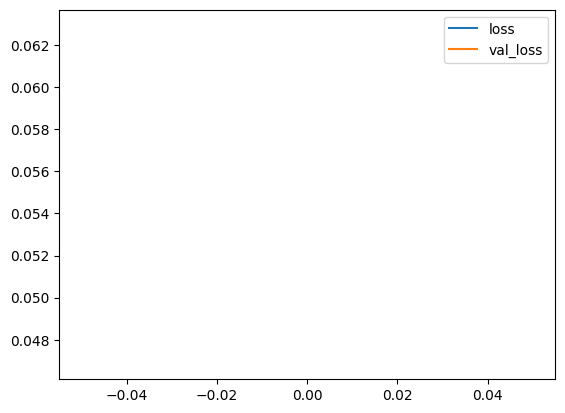

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

PREDICTIONS

In [ ]:
text = vectorizer('you bitch! how dare you speak to me like that')

In [ ]:
res = model.predict(np.array([text]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
res

array([[0.9886417 , 0.07939157, 0.9255964 , 0.02196837, 0.6708575 ,
        0.05884508]], dtype=float32)

In [ ]:
res  = model.predict(np.expand_dims(text, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
res

array([[0.9886417 , 0.07939157, 0.9255964 , 0.02196837, 0.6708575 ,
        0.05884508]], dtype=float32)

In [ ]:
from tensorflow.keras.metrics import Precision , Recall , CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()


In [ ]:
for batch in test.as_numpy_iterator():
  # unpack the batch
  x_true , y_true = batch
  # prediction
  yhat = model.predict(x_true)
  # flatten the prediction
  y_true = y_true.flatten()
  yhat = yhat.flatten()
  # update these metrics
  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8284872770309448, Recall: 0.6378577351570129, Accuracy: 0.48946839570999146


GRADIO

In [ ]:
!pip install gradio jinja2

In [ ]:
import gradio as gr

SAVE MODEL

In [ ]:
model.save('comment_toxicity.h5')

In [ ]:
from google.colab import files
files.download('comment_toxicity.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def commentor(comment):
  vec = vectorizer([comment])
  res = model.predict(vec)

  txt = ''
  for idx , col in enumerate(df.columns[2:]):
    txt += '{}: {}\n'.format(col, res[0][idx]>0.5)
  return txt

In [ ]:
interface = gr.Interface(fn=commentor,
                         inputs=gr.Textbox(lines=2, placeholder='Comment here...'),
                         outputs='text')

In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7a51ce5313f4825297.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
